## Transfer Learning Resnet 50 using Keras

Please download the dataset from the below url

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
tf.__version__

'2.4.0'

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/train'
valid_path = '/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

#vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
resnet50= ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# don't train existing weights
for layer in resnet50.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/train/*')

In [ ]:
folders


['/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/train/diseased cotton plant',
 '/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/train/diseased cotton leaf',
 '/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/train/fresh cotton leaf',
 '/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/train/fresh cotton plant']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet50.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet50.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1949 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
61/61 [==============================] - 1079s 18s/step - loss: 5.1495 - accuracy: 0.3197 - val_loss: 1.3175 - val_accuracy: 0.3868
Epoch 2/10
61/61 [==============================] - 307s 5s/step - loss: 1.2384 - accuracy: 0.5397 - val_loss: 0.9633 - val_accuracy: 0.6415
Epoch 3/10
61/61 [==============================] - 308s 5s/step - loss: 1.0279 - accuracy: 0.6006 - val_loss: 0.8966 - val_accuracy: 0.6132
Epoch 4/10
61/61 [==============================] - 308s 5s/step - loss: 1.0899 - accuracy: 0.5989 - val_loss: 1.5025 - val_accuracy: 0.5566
Epoch 5/10
61/61 [==============================] - 309s 5s/step - loss: 1.0341 - accuracy: 0.6010 - val_loss: 1.3110 - val_accuracy: 0.6321
Epoch 6/10
61/61 [==============================] - 308s 5s/step - loss: 1.0151 - accuracy: 0.6126 - val_loss: 0.8741 - val_accuracy: 0.6132
Epoch 7/10
61/61 [==============================] - 308s 5s/step - loss: 0.8108 - accuracy: 0.6666 - val_loss: 0.8167 - val_accuracy: 0.6604
Epoch 8/10


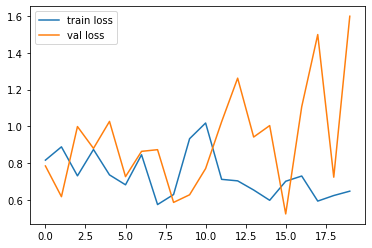

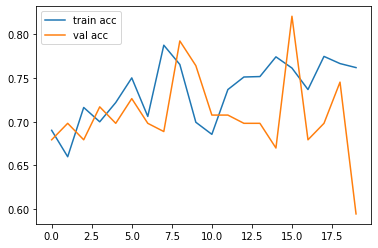

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_Resnet50.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[2.14088839e-02, 9.76230621e-01, 3.77227960e-04, 1.98329566e-03],
       [4.58401162e-03, 8.21438897e-03, 8.68509889e-01, 1.18691698e-01],
       [1.50518462e-01, 4.00675774e-01, 4.19094503e-01, 2.97112614e-02],
       [1.14974391e-03, 2.71609098e-01, 7.23452866e-01, 3.78831057e-03],
       [1.07577938e-08, 2.07543405e-09, 9.99999881e-01, 1.02133114e-07],
       [6.19133561e-06, 1.33670622e-03, 9.97764587e-01, 8.92494048e-04],
       [1.03580696e-03, 8.54220212e-01, 1.01377368e-01, 4.33666073e-02],
       [1.02512458e-04, 9.92452323e-01, 1.10594055e-03, 6.33933023e-03],
       [1.96463050e-04, 6.67149305e-01, 3.26556861e-01, 6.09740010e-03],
       [7.30686297e-04, 1.04265988e-01, 8.94105911e-01, 8.97430582e-04],
       [5.27944299e-04, 8.09085183e-03, 8.59249353e-01, 1.32131815e-01],
       [2.27292068e-03, 8.86488706e-02, 8.94335330e-01, 1.47428336e-02],
       [1.53723429e-03, 3.66696686e-01, 5.83388209e-02, 5.73427200e-01],
       [1.32698071e-04, 6.40088320e-03, 9.86958206e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 3, 2, 2, 0, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 0, 2, 1, 1, 3, 2, 1, 1, 1, 1, 2, 2, 0, 3, 1, 2, 2, 2, 2,
       0, 2, 2, 3, 2, 2, 3, 2, 3, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2,
       0, 3, 2, 2, 2, 1, 2, 3, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_Resnet50.h5')

In [ ]:
img=image.load_img('/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/freah_leaf.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[105., 162.,  93.],
        [ 95., 128.,  71.],
        [ 98., 107.,  64.],
        ...,
        [126., 105.,  78.],
        [117.,  96.,  69.],
        [147., 126.,  99.]],

       [[ 97., 152.,  84.],
        [ 97., 135.,  76.],
        [104., 120.,  75.],
        ...,
        [128., 107.,  80.],
        [128., 107.,  80.],
        [147., 126.,  99.]],

       [[ 99., 152.,  84.],
        [121., 162., 102.],
        [107., 133.,  85.],
        ...,
        [149., 128., 101.],
        [135., 114.,  87.],
        [124., 103.,  76.]],

       ...,

       [[126., 186., 100.],
        [126., 185., 101.],
        [126., 185., 105.],
        ...,
        [118., 115.,  80.],
        [127., 128.,  94.],
        [108., 109.,  75.]],

       [[123., 180.,  86.],
        [125., 181.,  90.],
        [127., 183.,  96.],
        ...,
        [112., 132.,  71.],
        [124., 122.,  84.],
        [116., 114.,  76.]],

       [[123., 180.,  86.],
        [125., 181.,  90.],
        [127., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[4.495920e-04, 4.180405e-24, 9.995504e-01, 2.592283e-28]],
      dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a

array([2])